In [1]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler

In [41]:
input_folder = '../data/training_dataset/'
training_data = np.load(input_folder + 'training_data.npy')
valid_periods = np.load(input_folder + 'valid_periods.npy')
categories = np.load(input_folder + 'categories.npy')
print("Training data shape: ", training_data.shape)
print("Valid periods data shape: ", valid_periods.shape)
print("Categories data shape: ", categories.shape)
print("Unique categories: ", np.unique(categories))
print("Example of valid periods: ", valid_periods[1])
print("Sequence lengths: ", valid_periods[:10, 1] - valid_periods[:10, 0])
print("Maximum minimum sequence length: ", (valid_periods[:, 1] - valid_periods[:, 0]).min(), (valid_periods[:, 1] - valid_periods[:, 0]).max())
print("Minimum maximum: ", training_data.min(), training_data.max())

Training data shape:  (48000, 2776)
Valid periods data shape:  (48000, 2)
Categories data shape:  (48000,)
Unique categories:  ['A' 'B' 'C' 'D' 'E' 'F']
Example of valid periods:  [2325 2776]
Sequence lengths:  [451 451 451  64  94 648  94  94 804 348]
Maximum minimum sequence length:  24 2776
Minimum maximum:  0.0 1.0


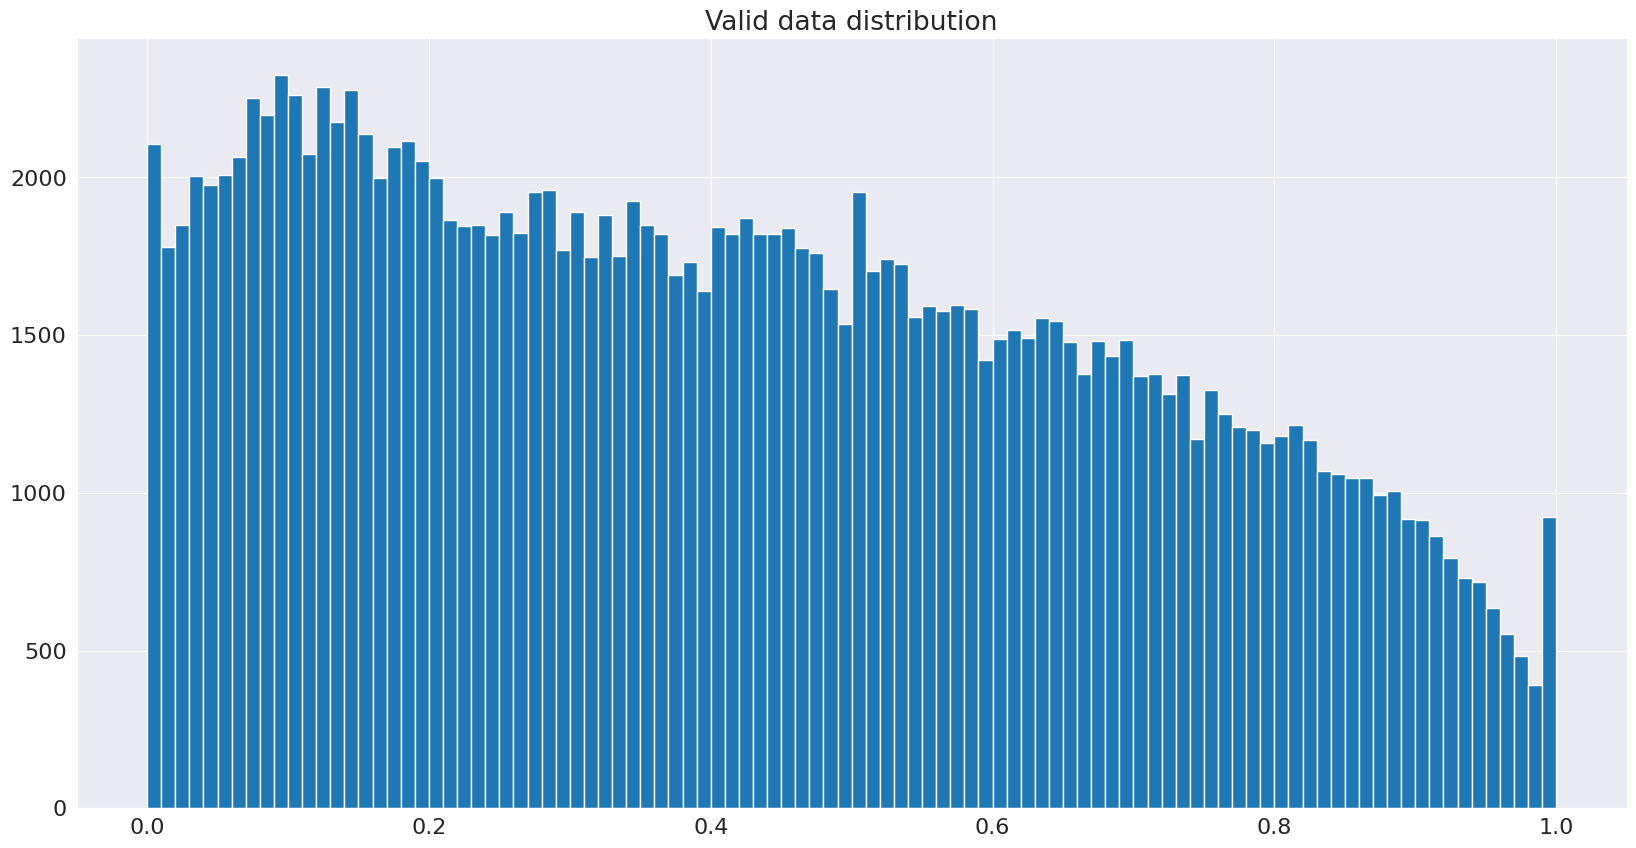

In [36]:
flatten_clean_data = np.array([])
for i in range(800):
    d = np.random.randint(0, training_data.shape[0])
    flatten_clean_data = np.append(flatten_clean_data, training_data[d, valid_periods[d, 0]:valid_periods[d, 1]])
    
# plot valid data distribution
plt.figure(figsize=(20, 10))
plt.hist(flatten_clean_data, bins=100)
plt.title('Valid data distribution')
plt.show()
    


Text(0.5, 1.0, 'Sequence lengths distribution')

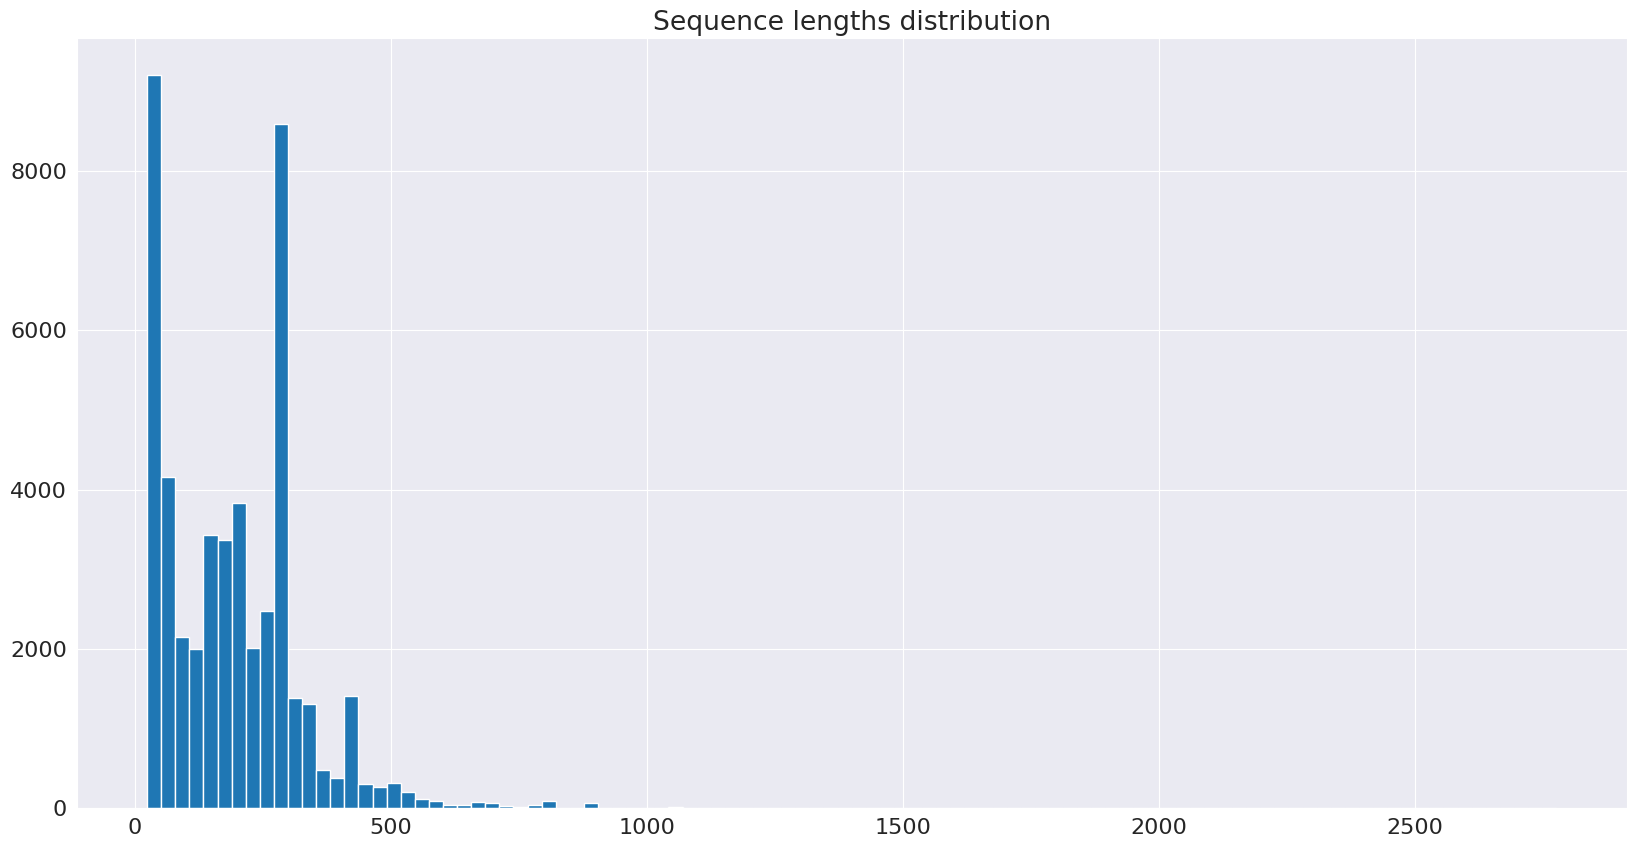

In [40]:
# plot sequence lengths distribution
plt.figure(figsize=(20, 10))
plt.hist(valid_periods[:, 1] - valid_periods[:, 0], bins=100)
plt.title('Sequence lengths distribution')

In [48]:
# print the number of sequences per category, the mean and std of the data in each category, and the min and max values. 
# Print them in a pretty table format, e.g. using pandas
df = pd.DataFrame(columns=['Category', 'Number of sequences', 'Mean', 'Std', 'Min', 'Max'])
for i in np.unique(categories):
    df = df.append({'Category': i, 
                    'Number of sequences': np.sum(categories == i), 
                    'Mean': np.mean(training_data[categories == i]), 
                    'Std': np.std(training_data[categories == i]), 
                    'Min': np.min(training_data[categories == i]), 
                    'Max': np.max(training_data[categories == i])}, ignore_index=True)
df = df.set_index('Category')
df
    
    
    

Number of sequences      Mean       Std  Min  Max
Category                                                  
A                       5728  0.046666  0.161872  0.0  1.0
B                      10987  0.024237  0.117269  0.0  1.0
C                      10017  0.031969  0.134708  0.0  1.0
D                      10016  0.032416  0.133929  0.0  1.0
E                      10975  0.024706  0.118947  0.0  1.0
F                        277  0.028432  0.127809  0.0  1.0

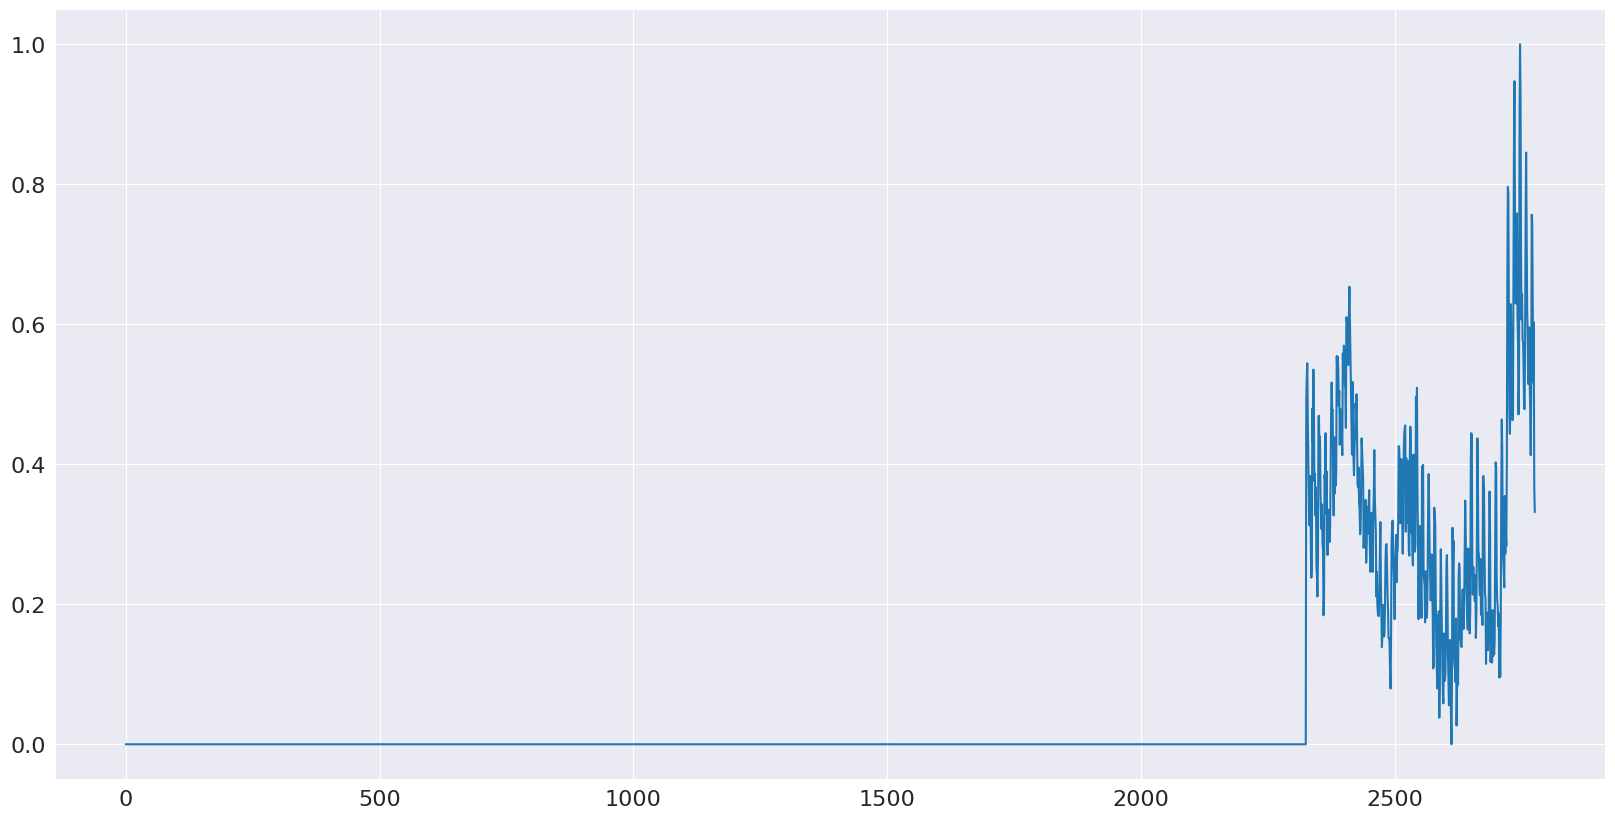

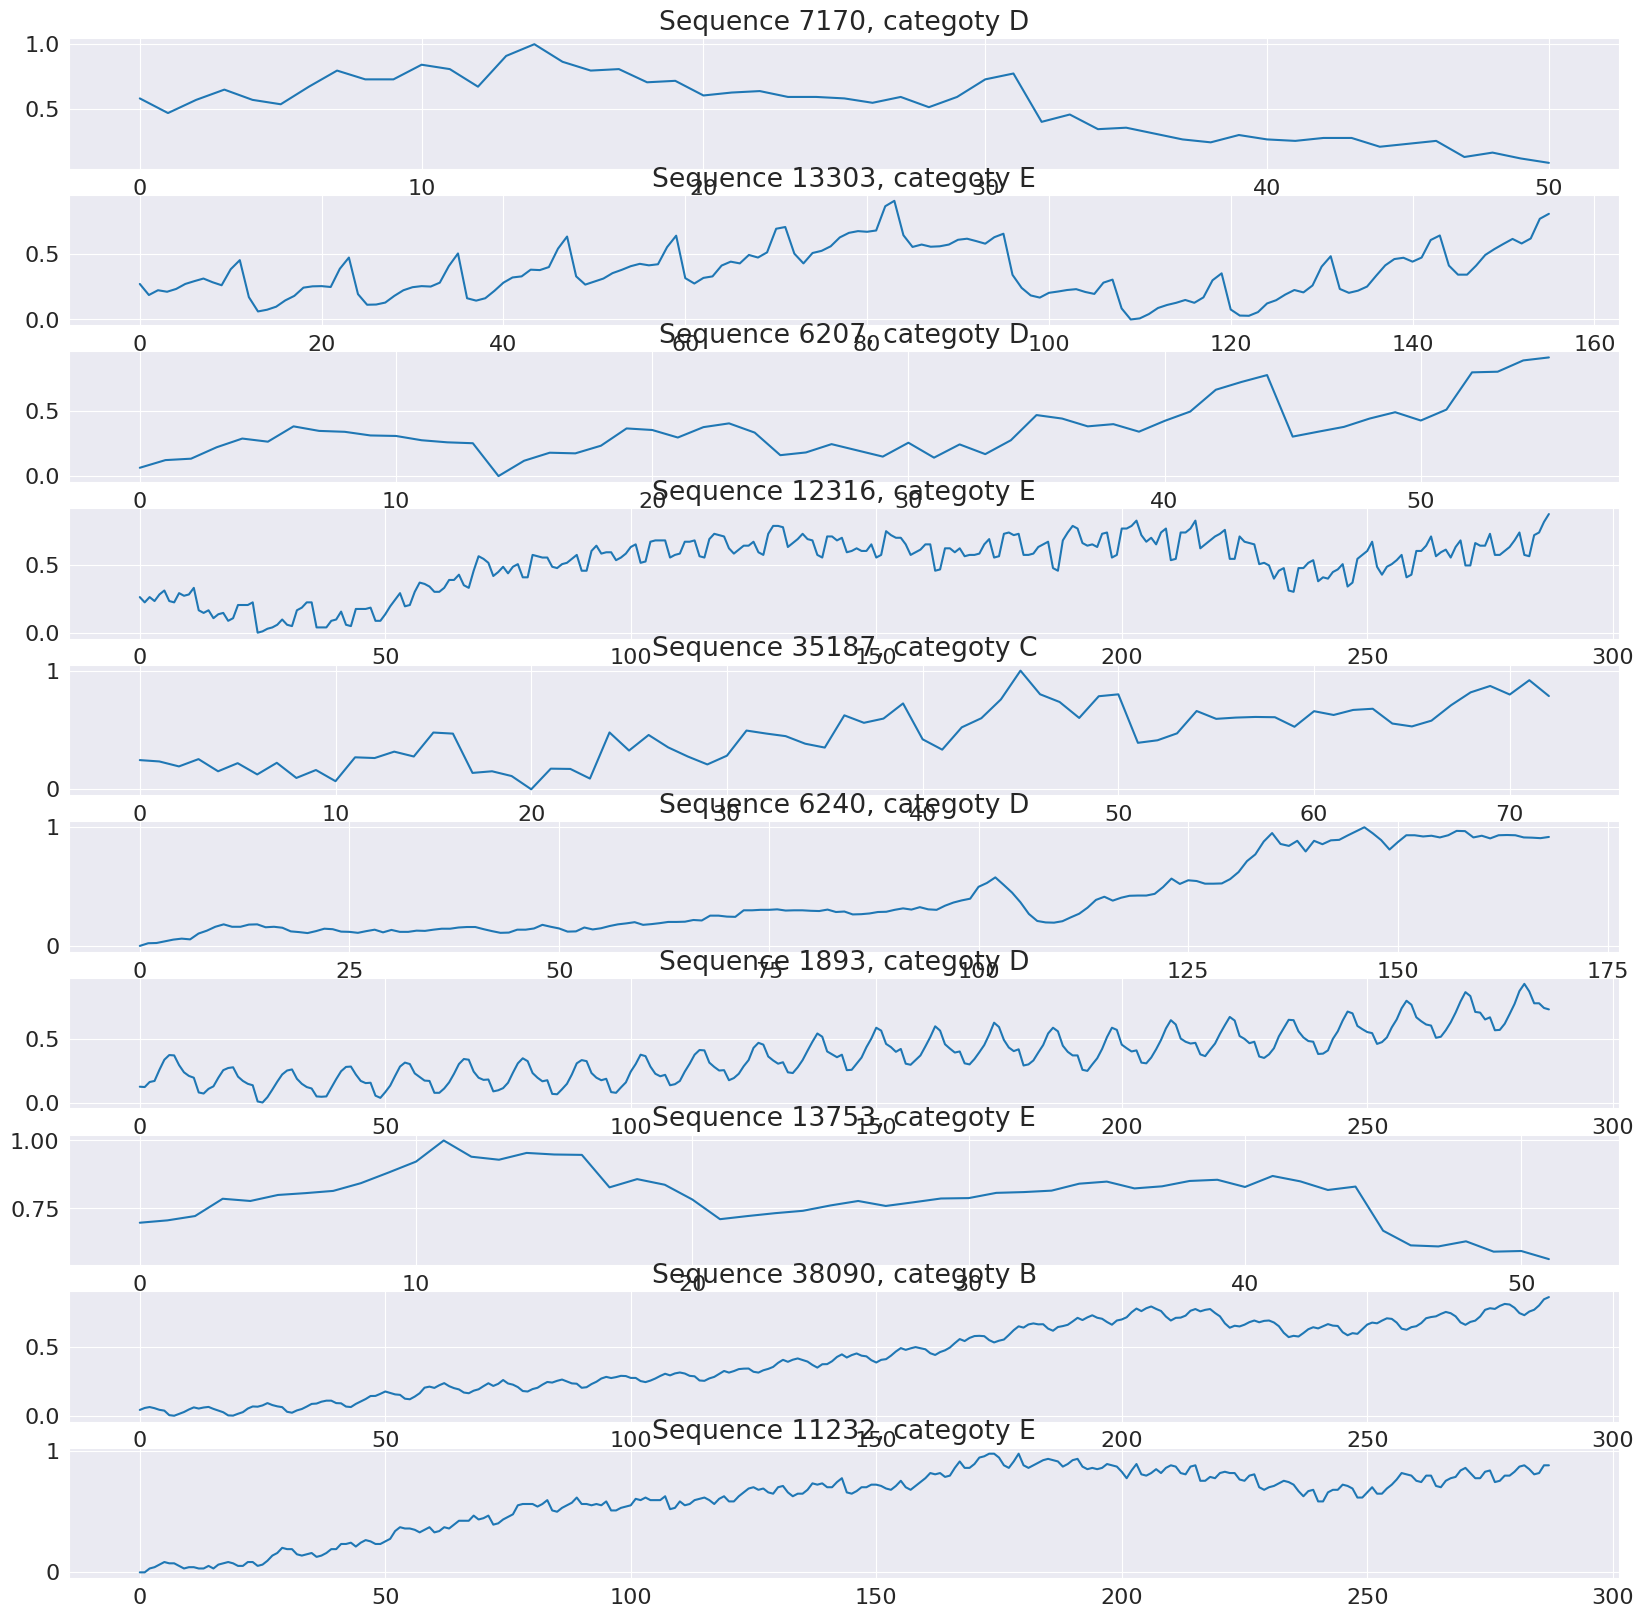

In [46]:
# plot the data
plt.figure(figsize=(20, 10))
plt.plot(training_data[0, :], label='Sequence 0')

n_subplots = 10
plt.figure(figsize=(20, 20))
for i in range(n_subplots):
    d = np.random.randint(0, training_data.shape[0])
    plt.subplot(n_subplots, 1, i+1)
    plt.plot(training_data[d, valid_periods[d, 0]:valid_periods[d, 1]])
    plt.title('Sequence {}, categoty {}'.format(d, categories[d]))



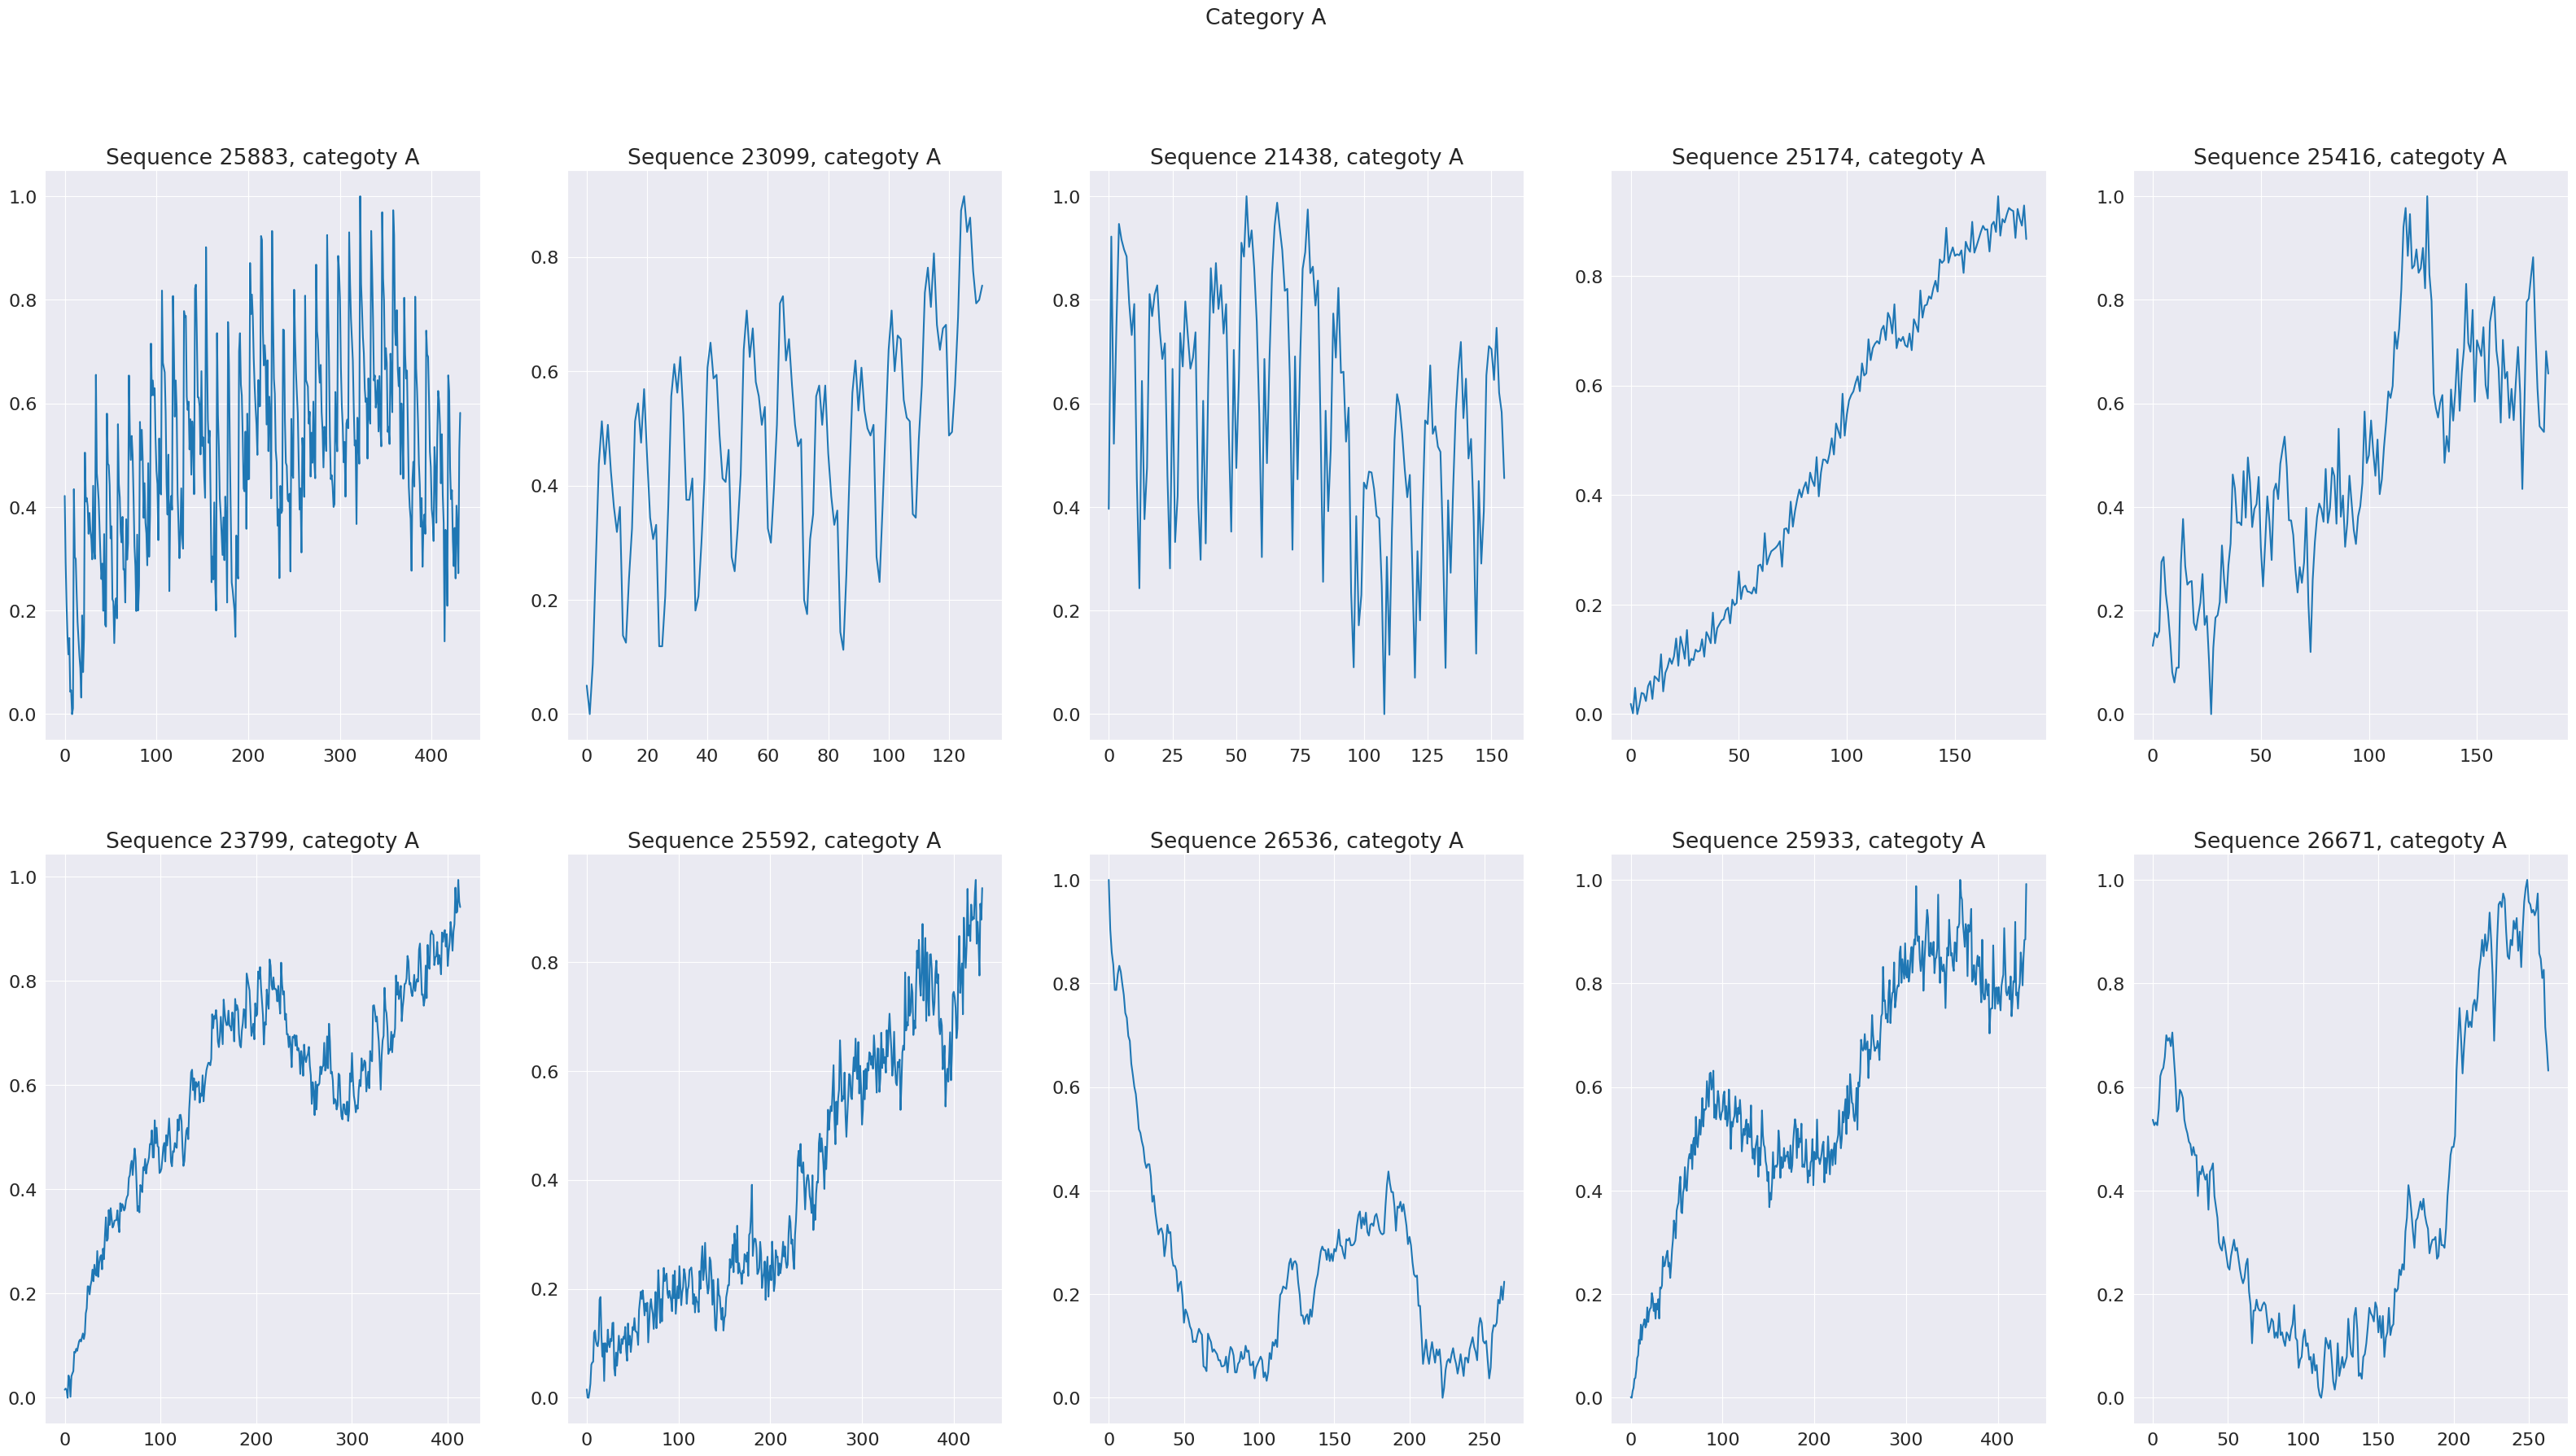

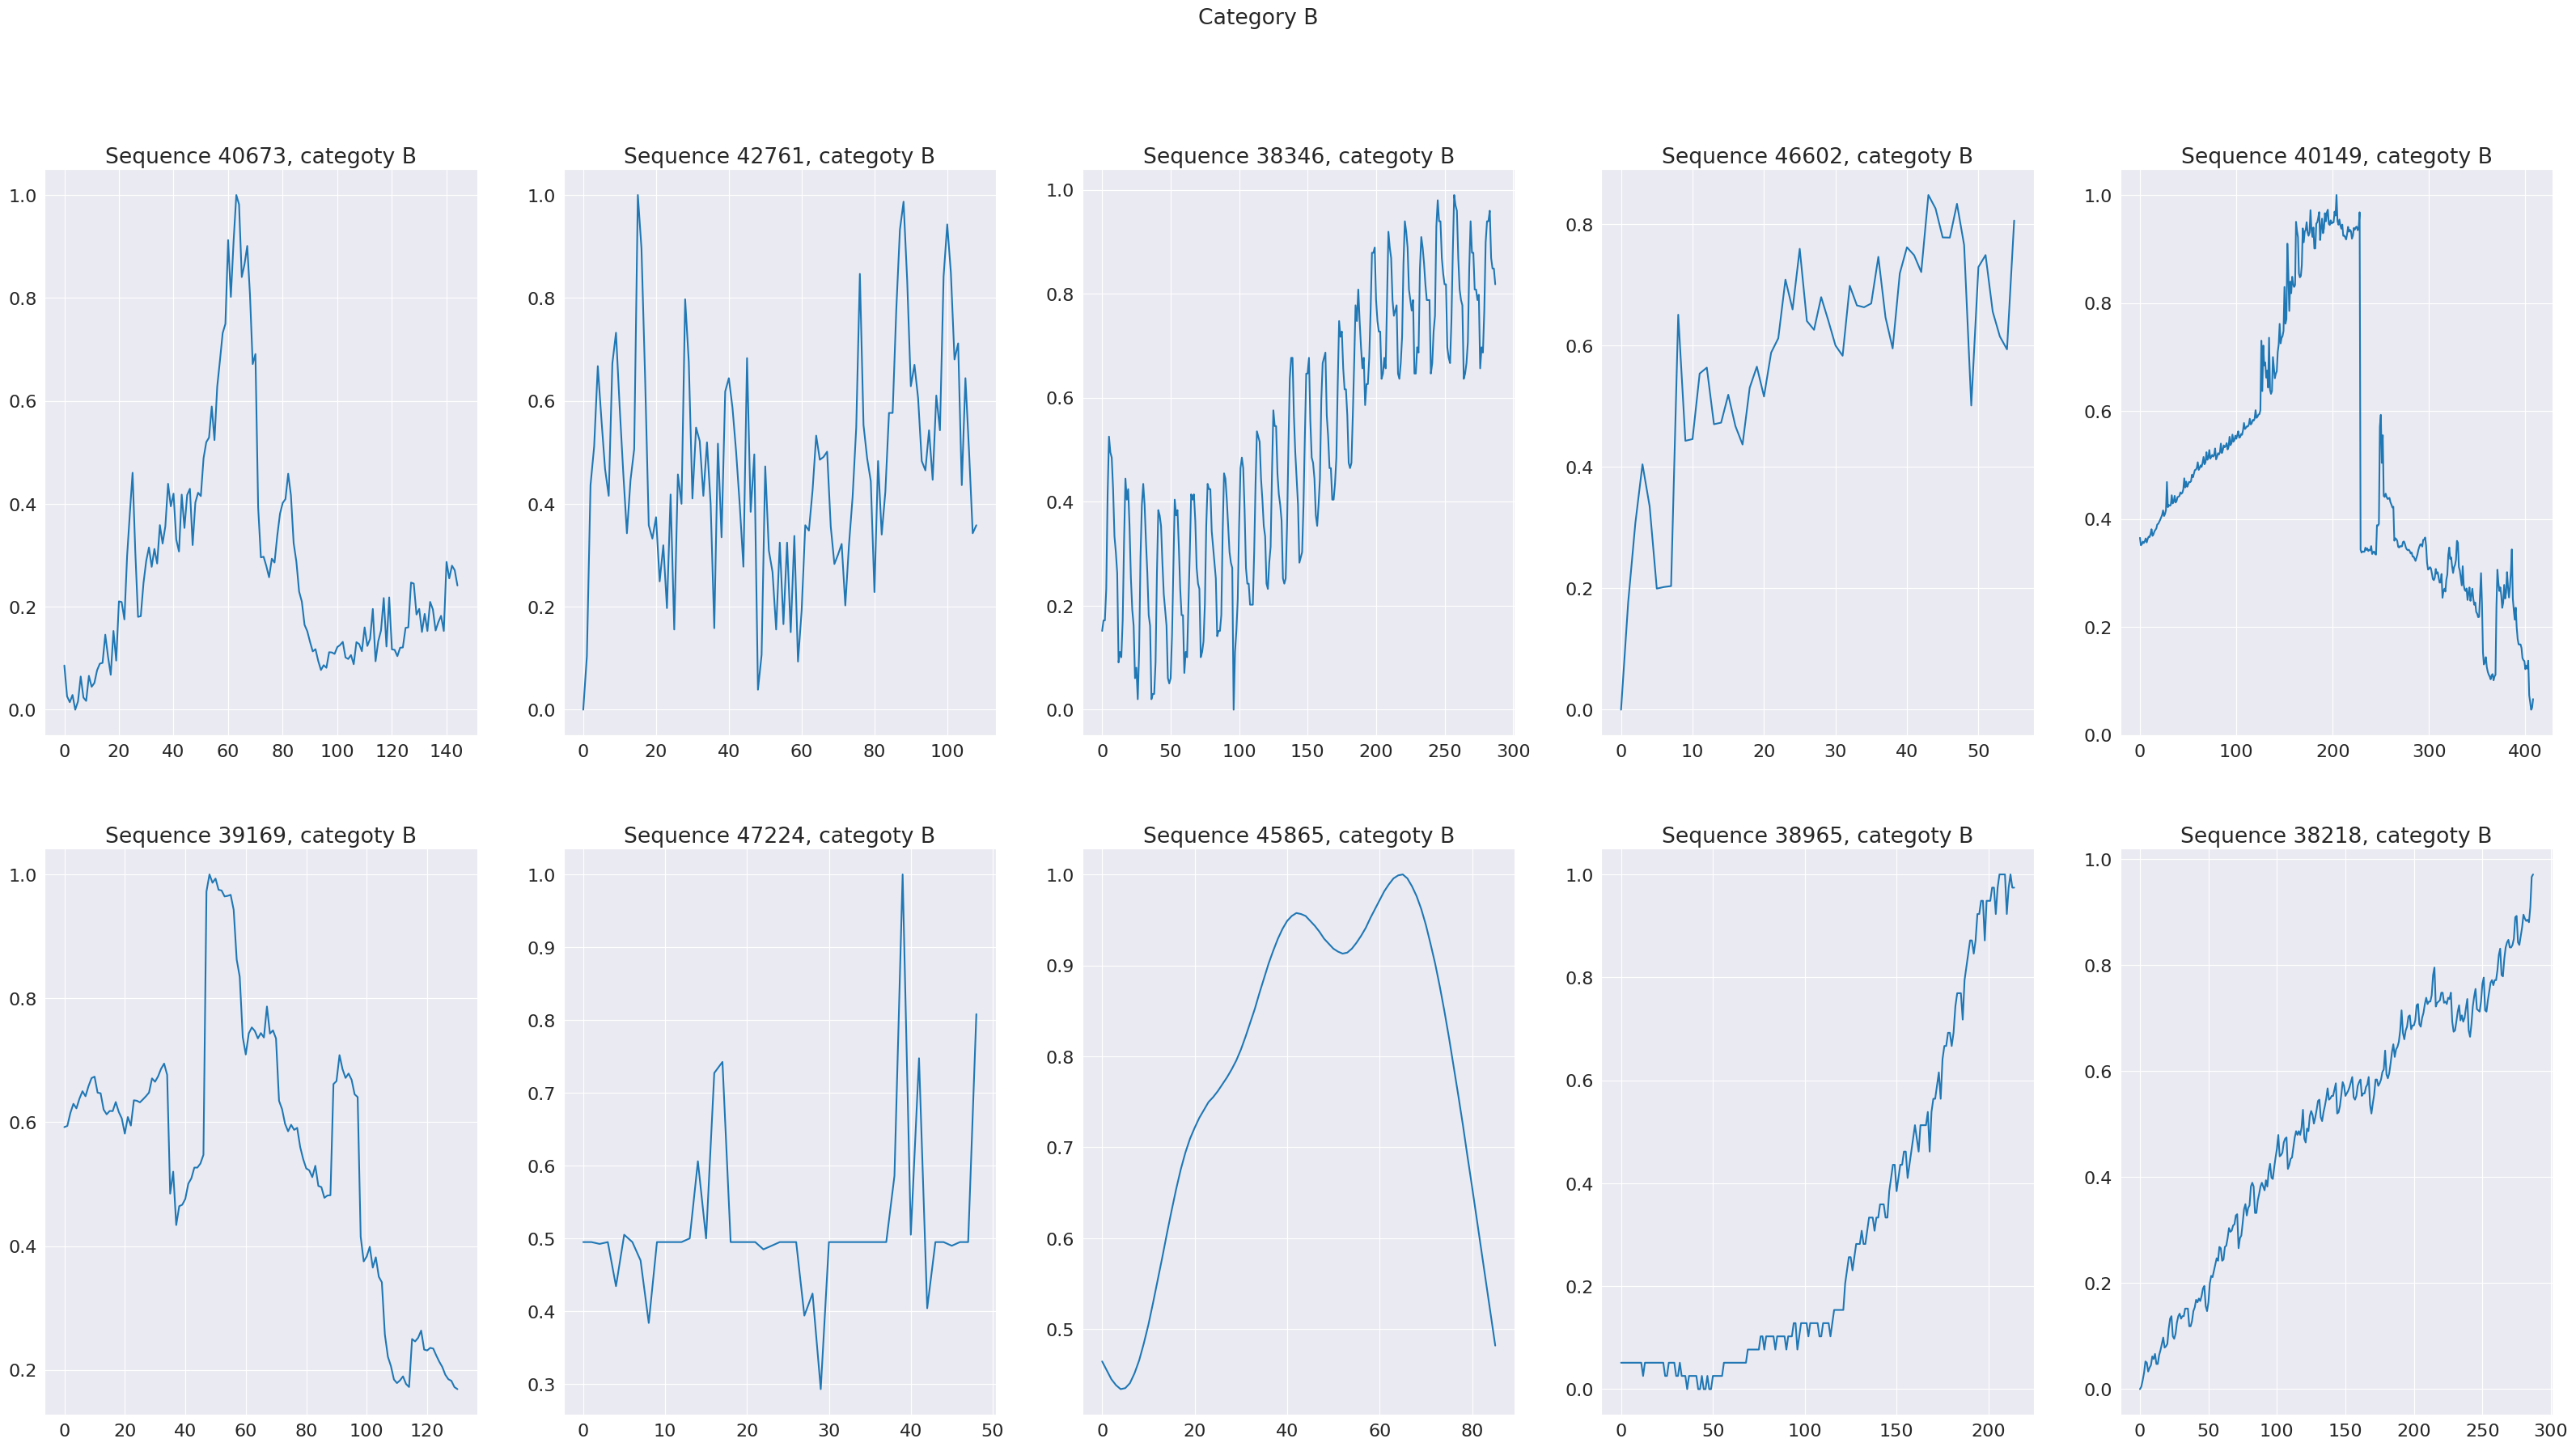

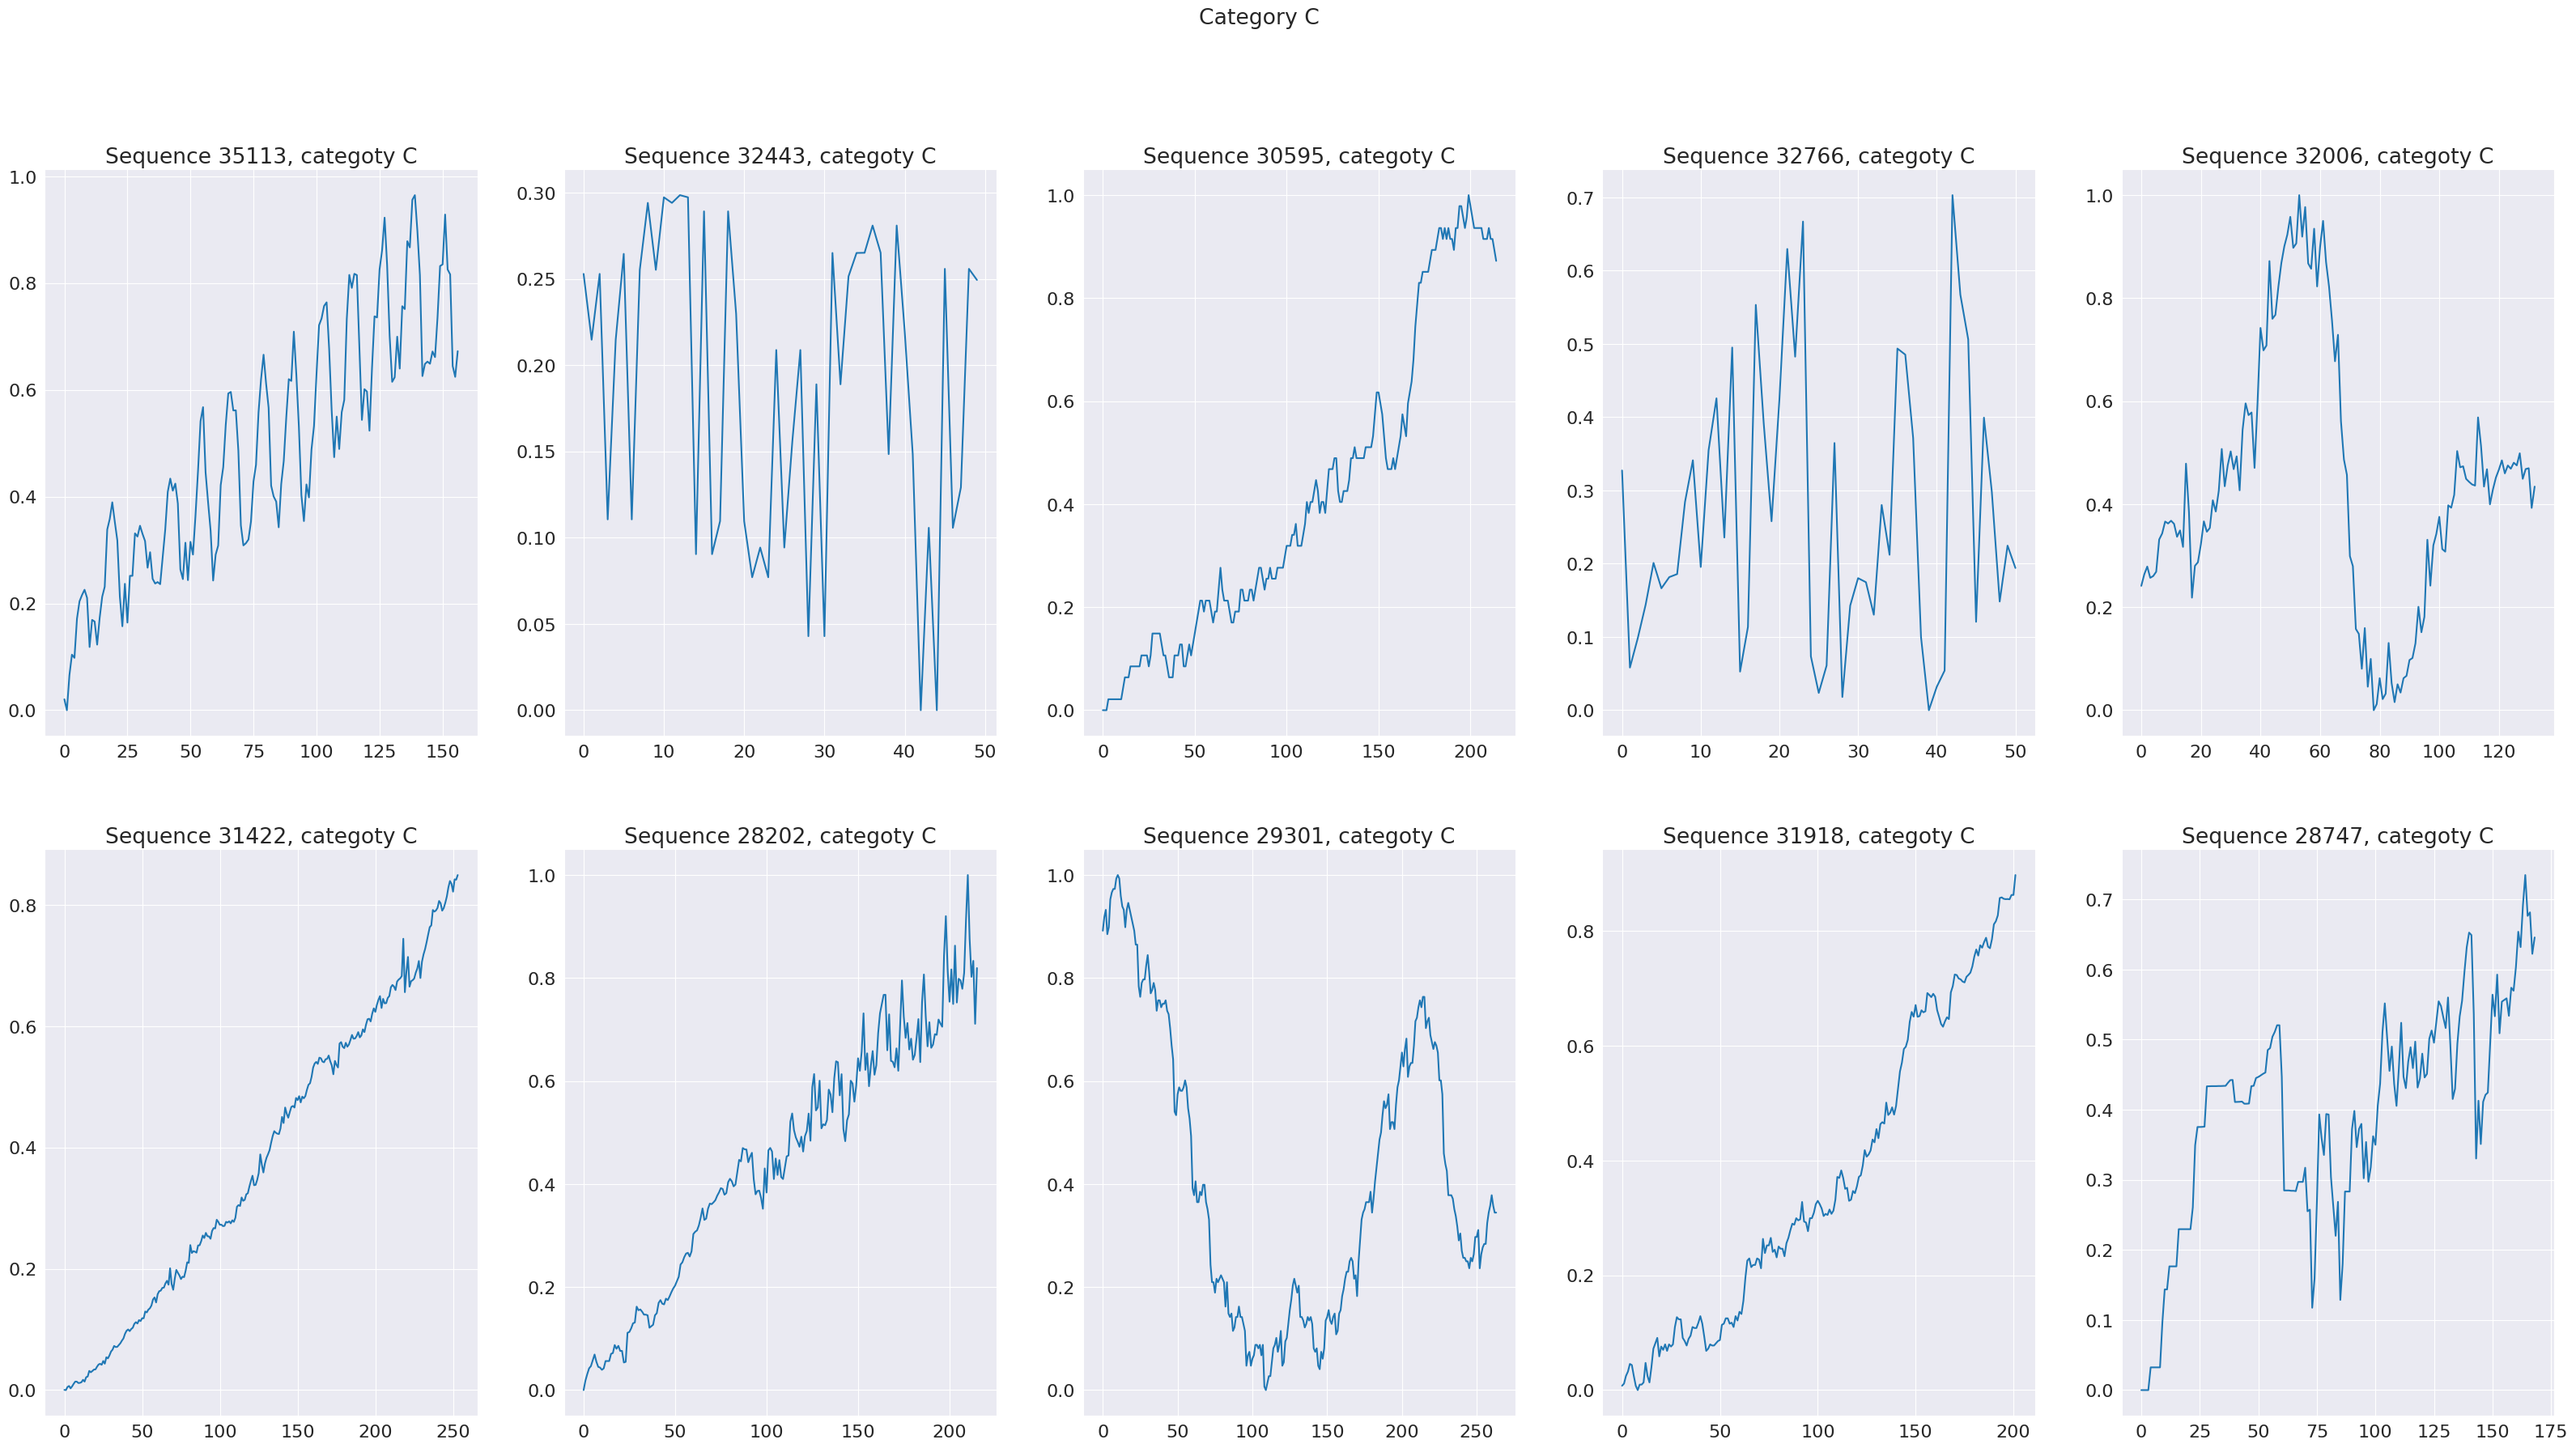

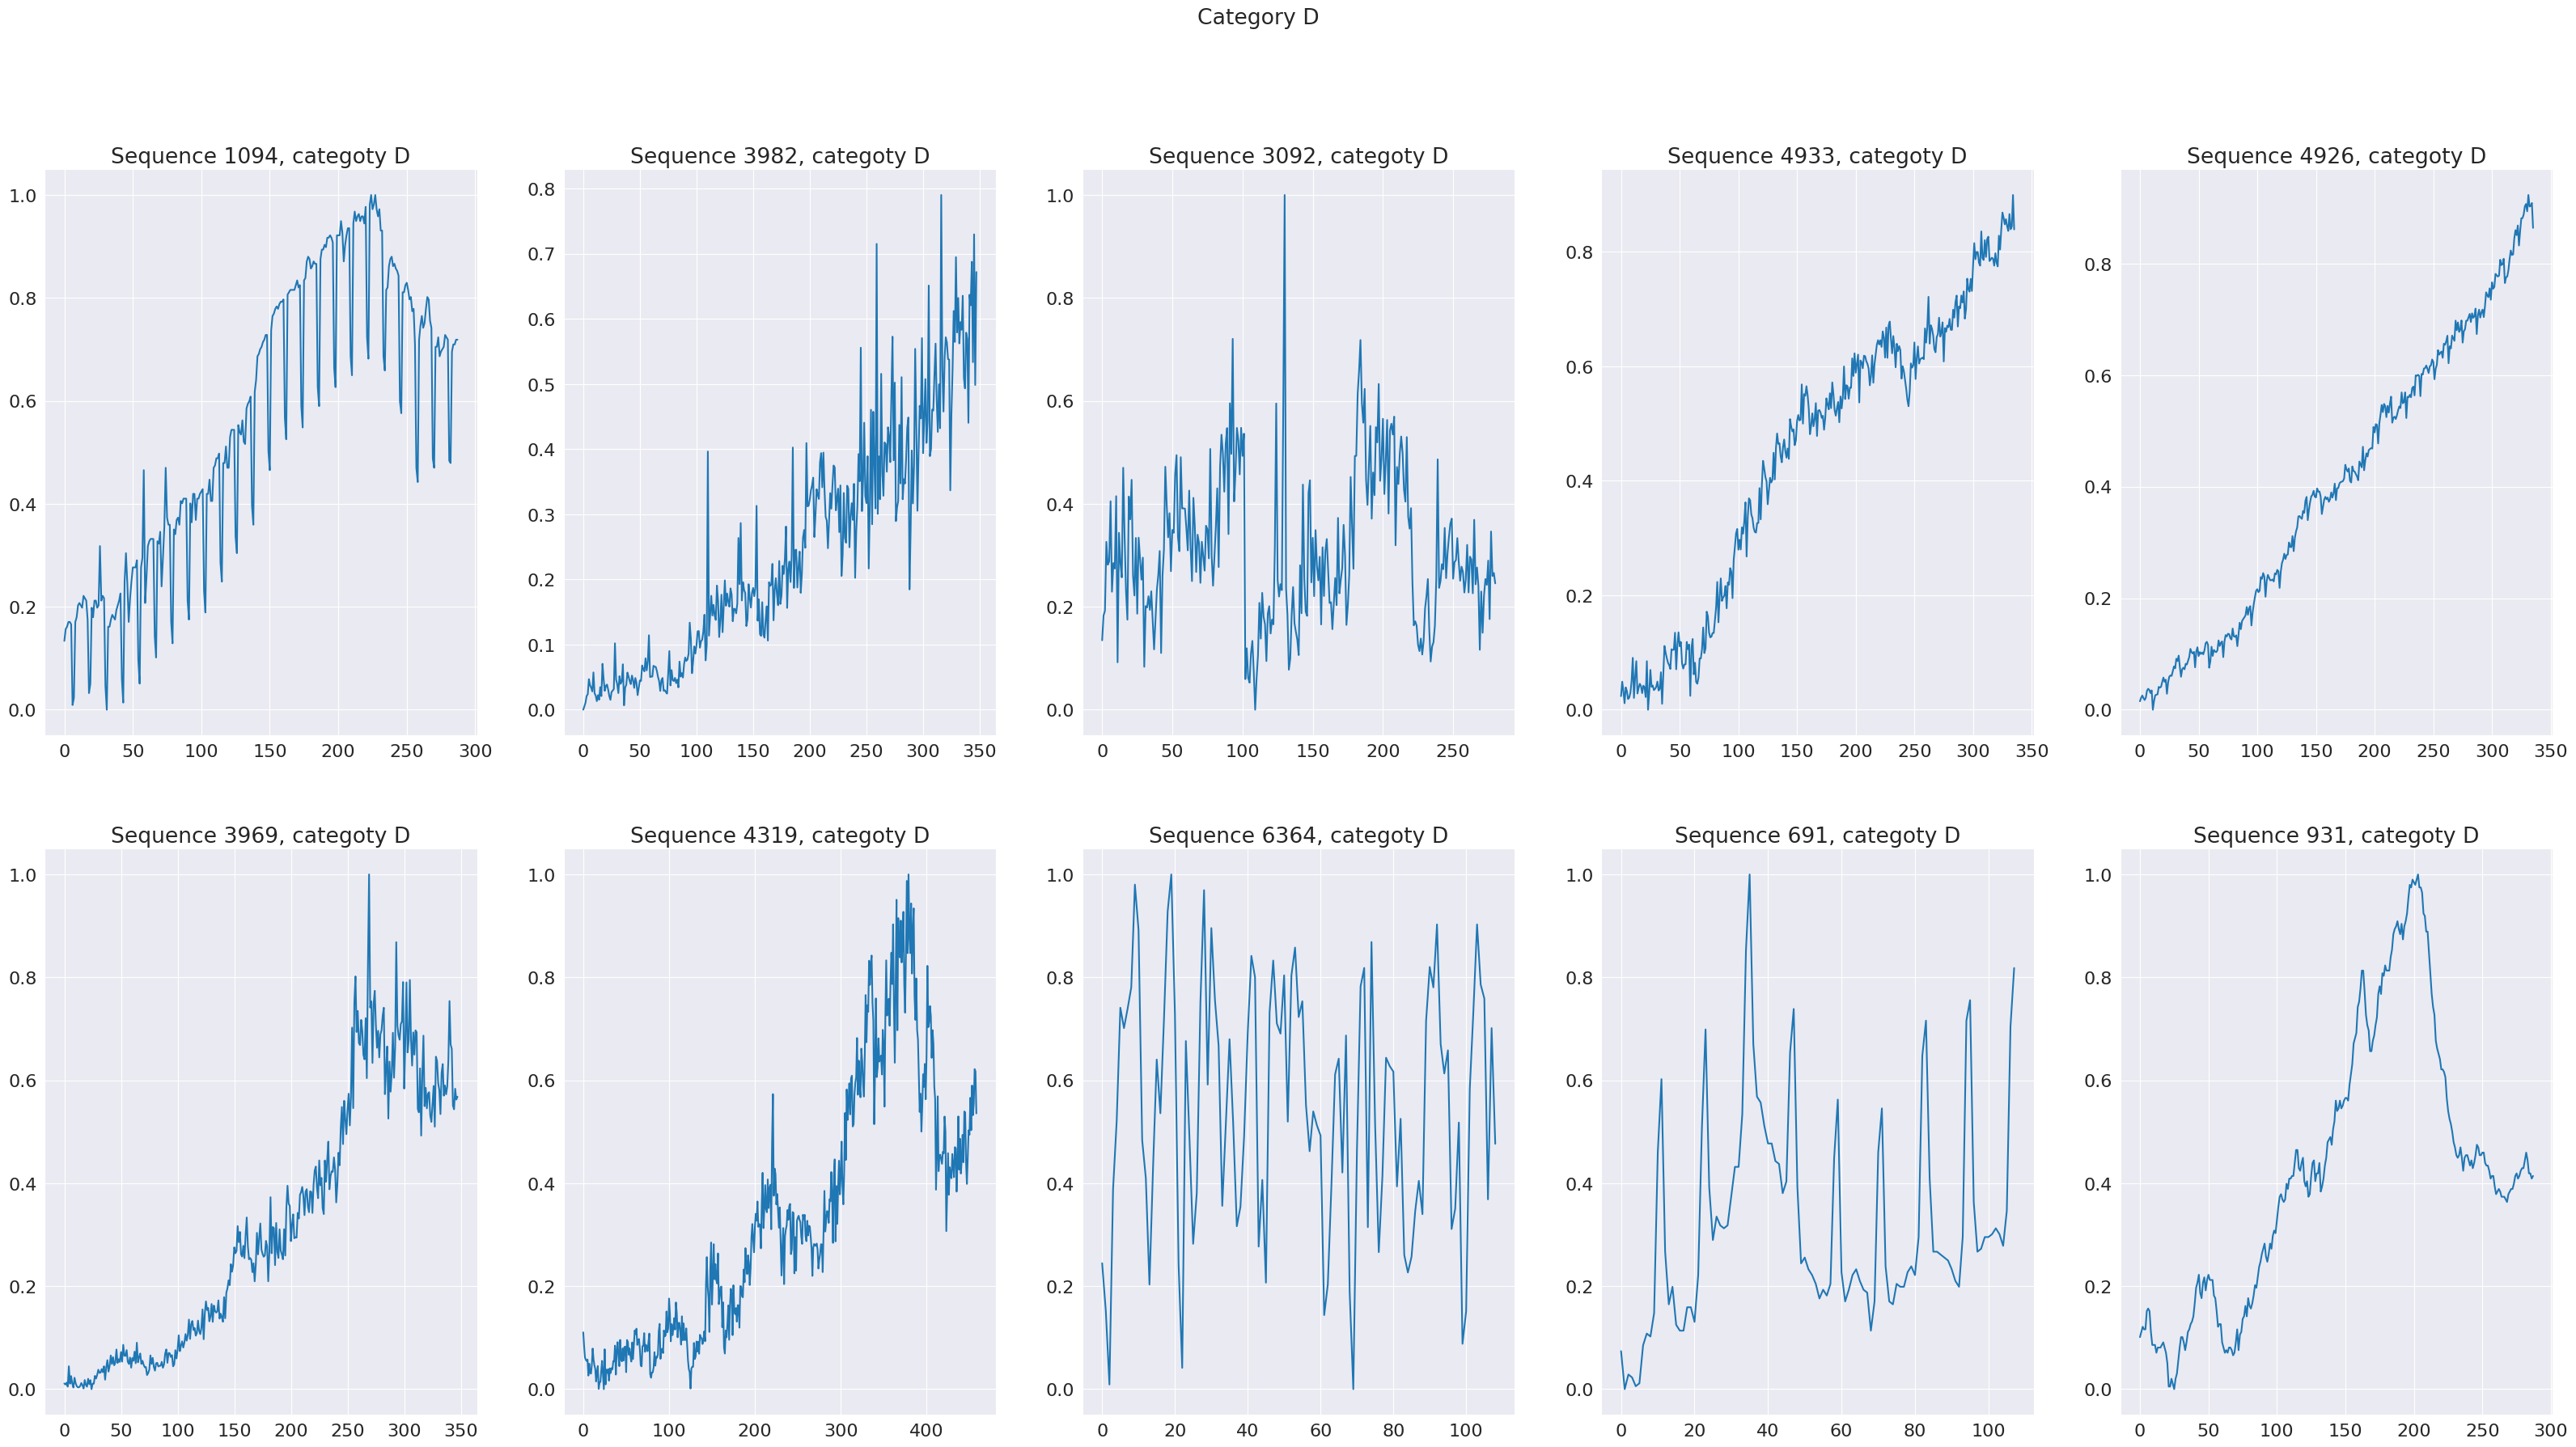

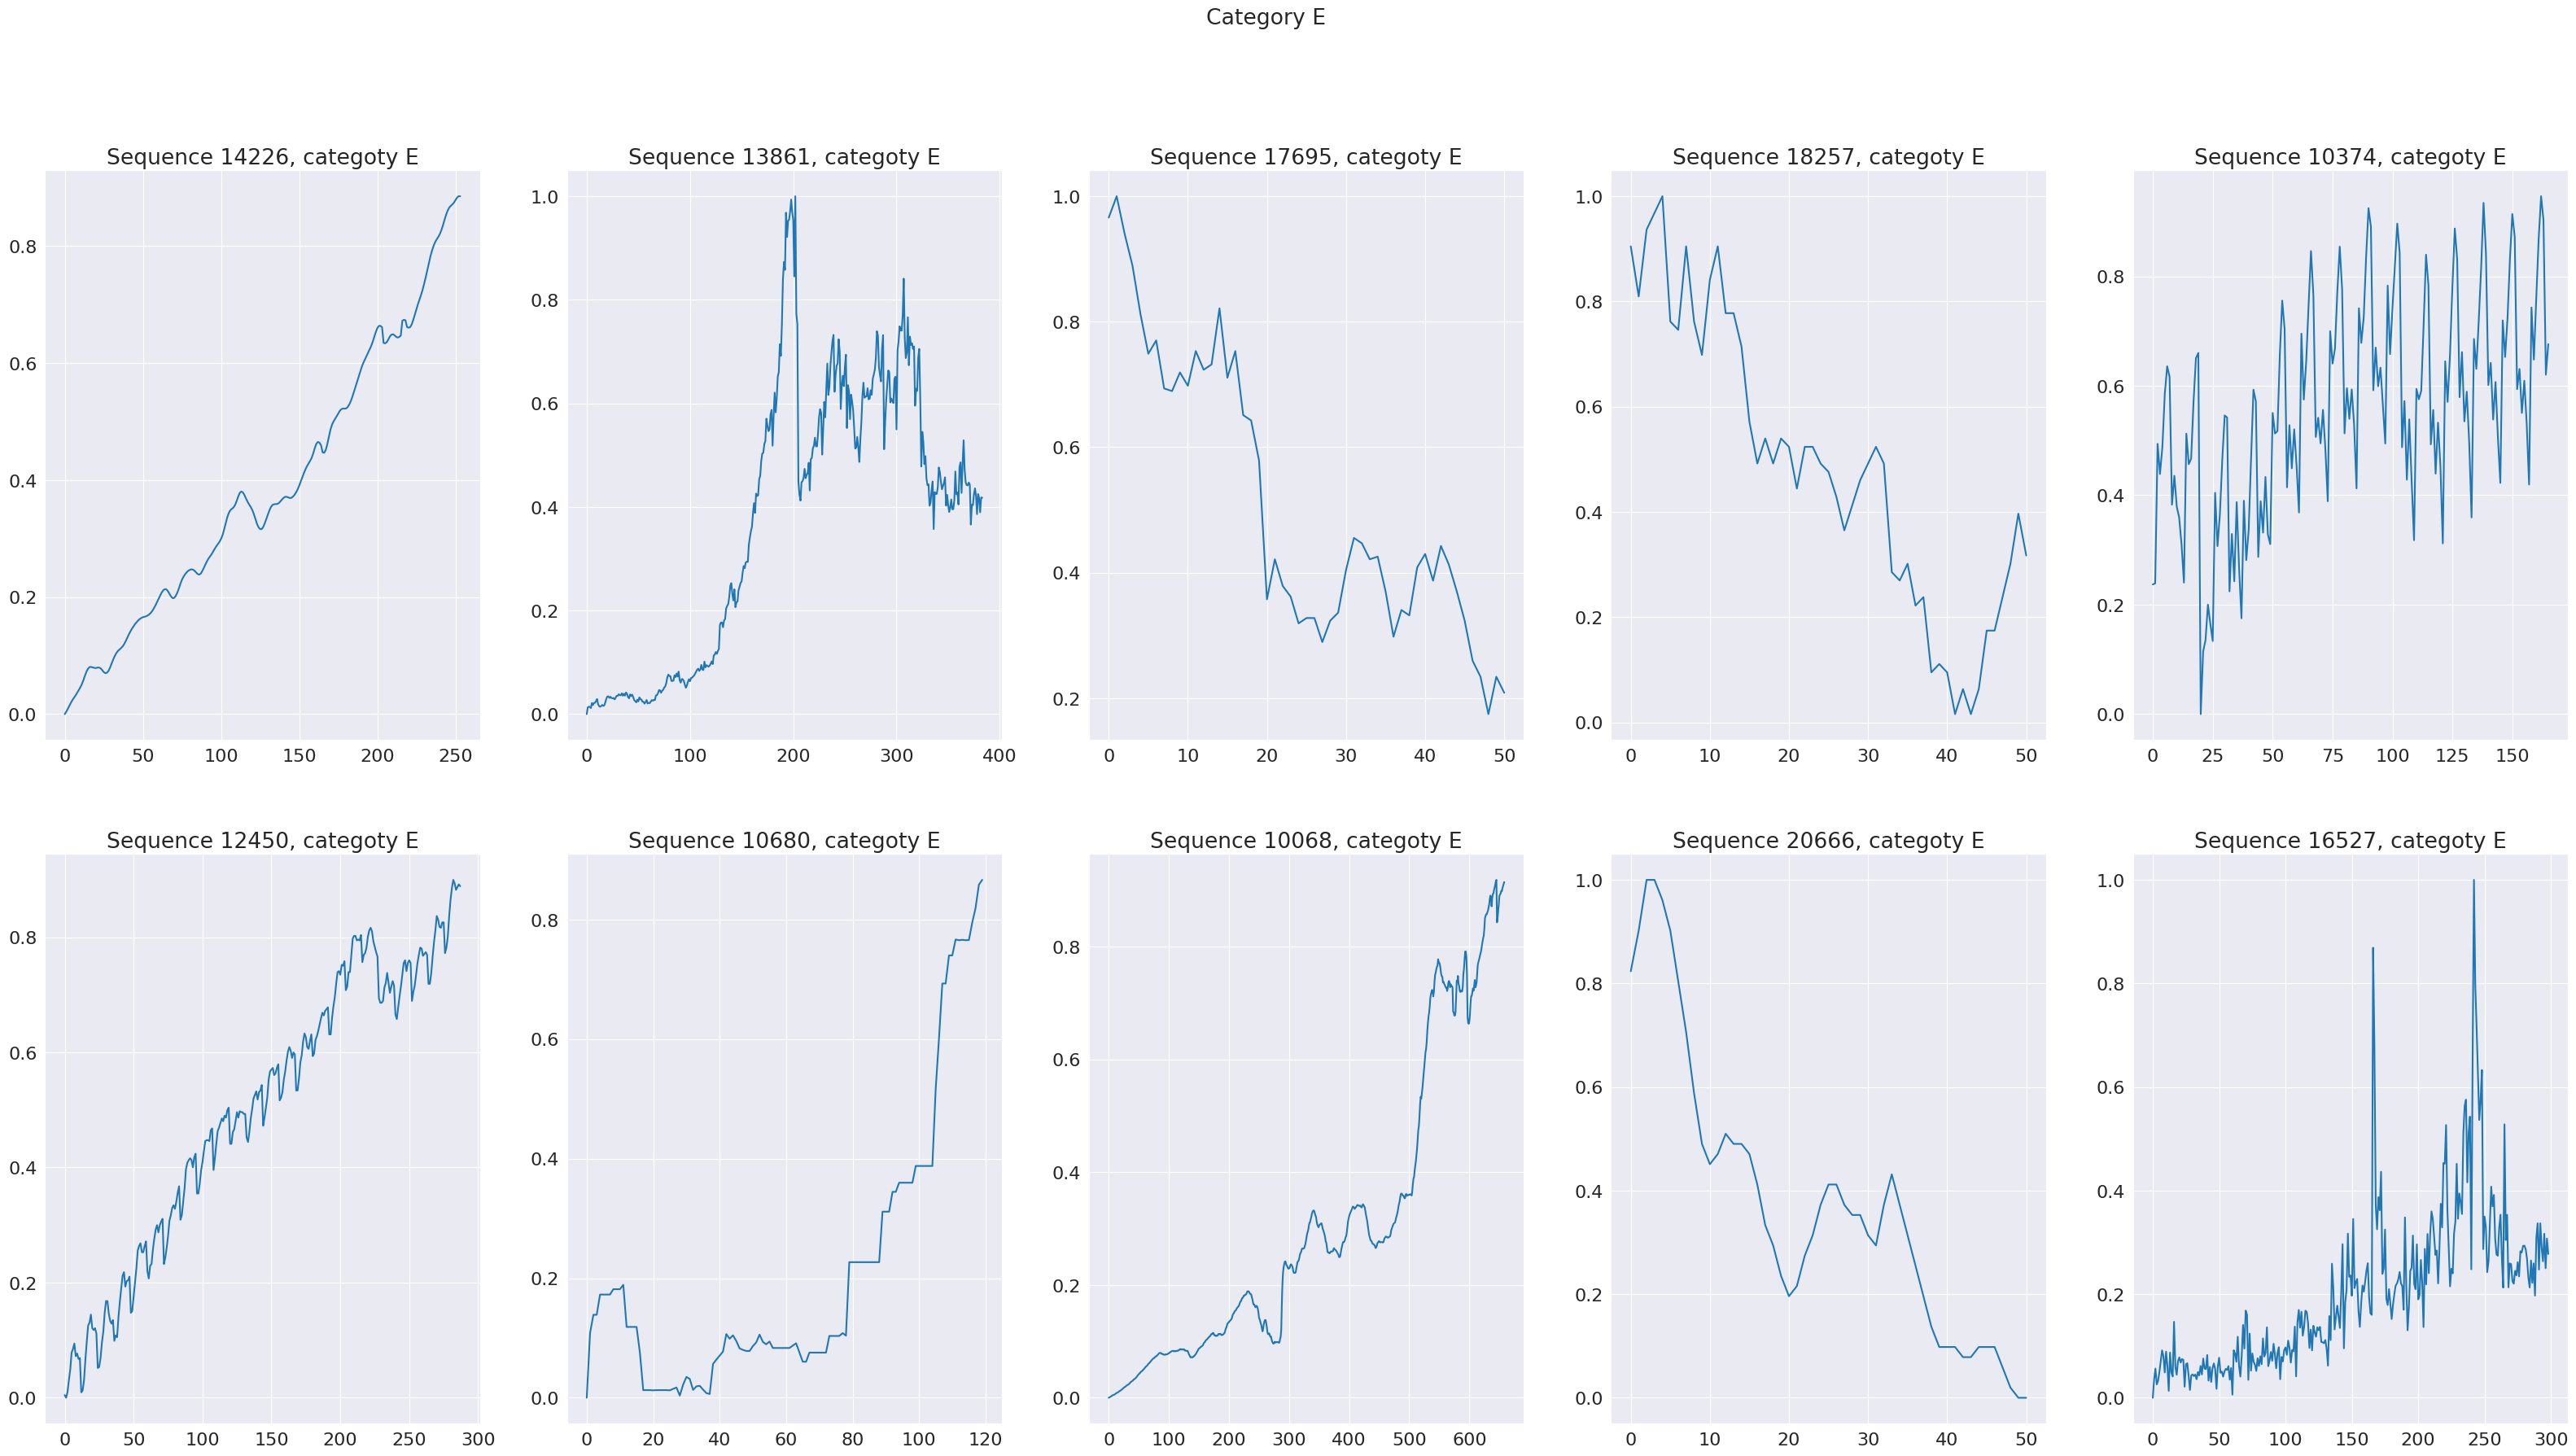

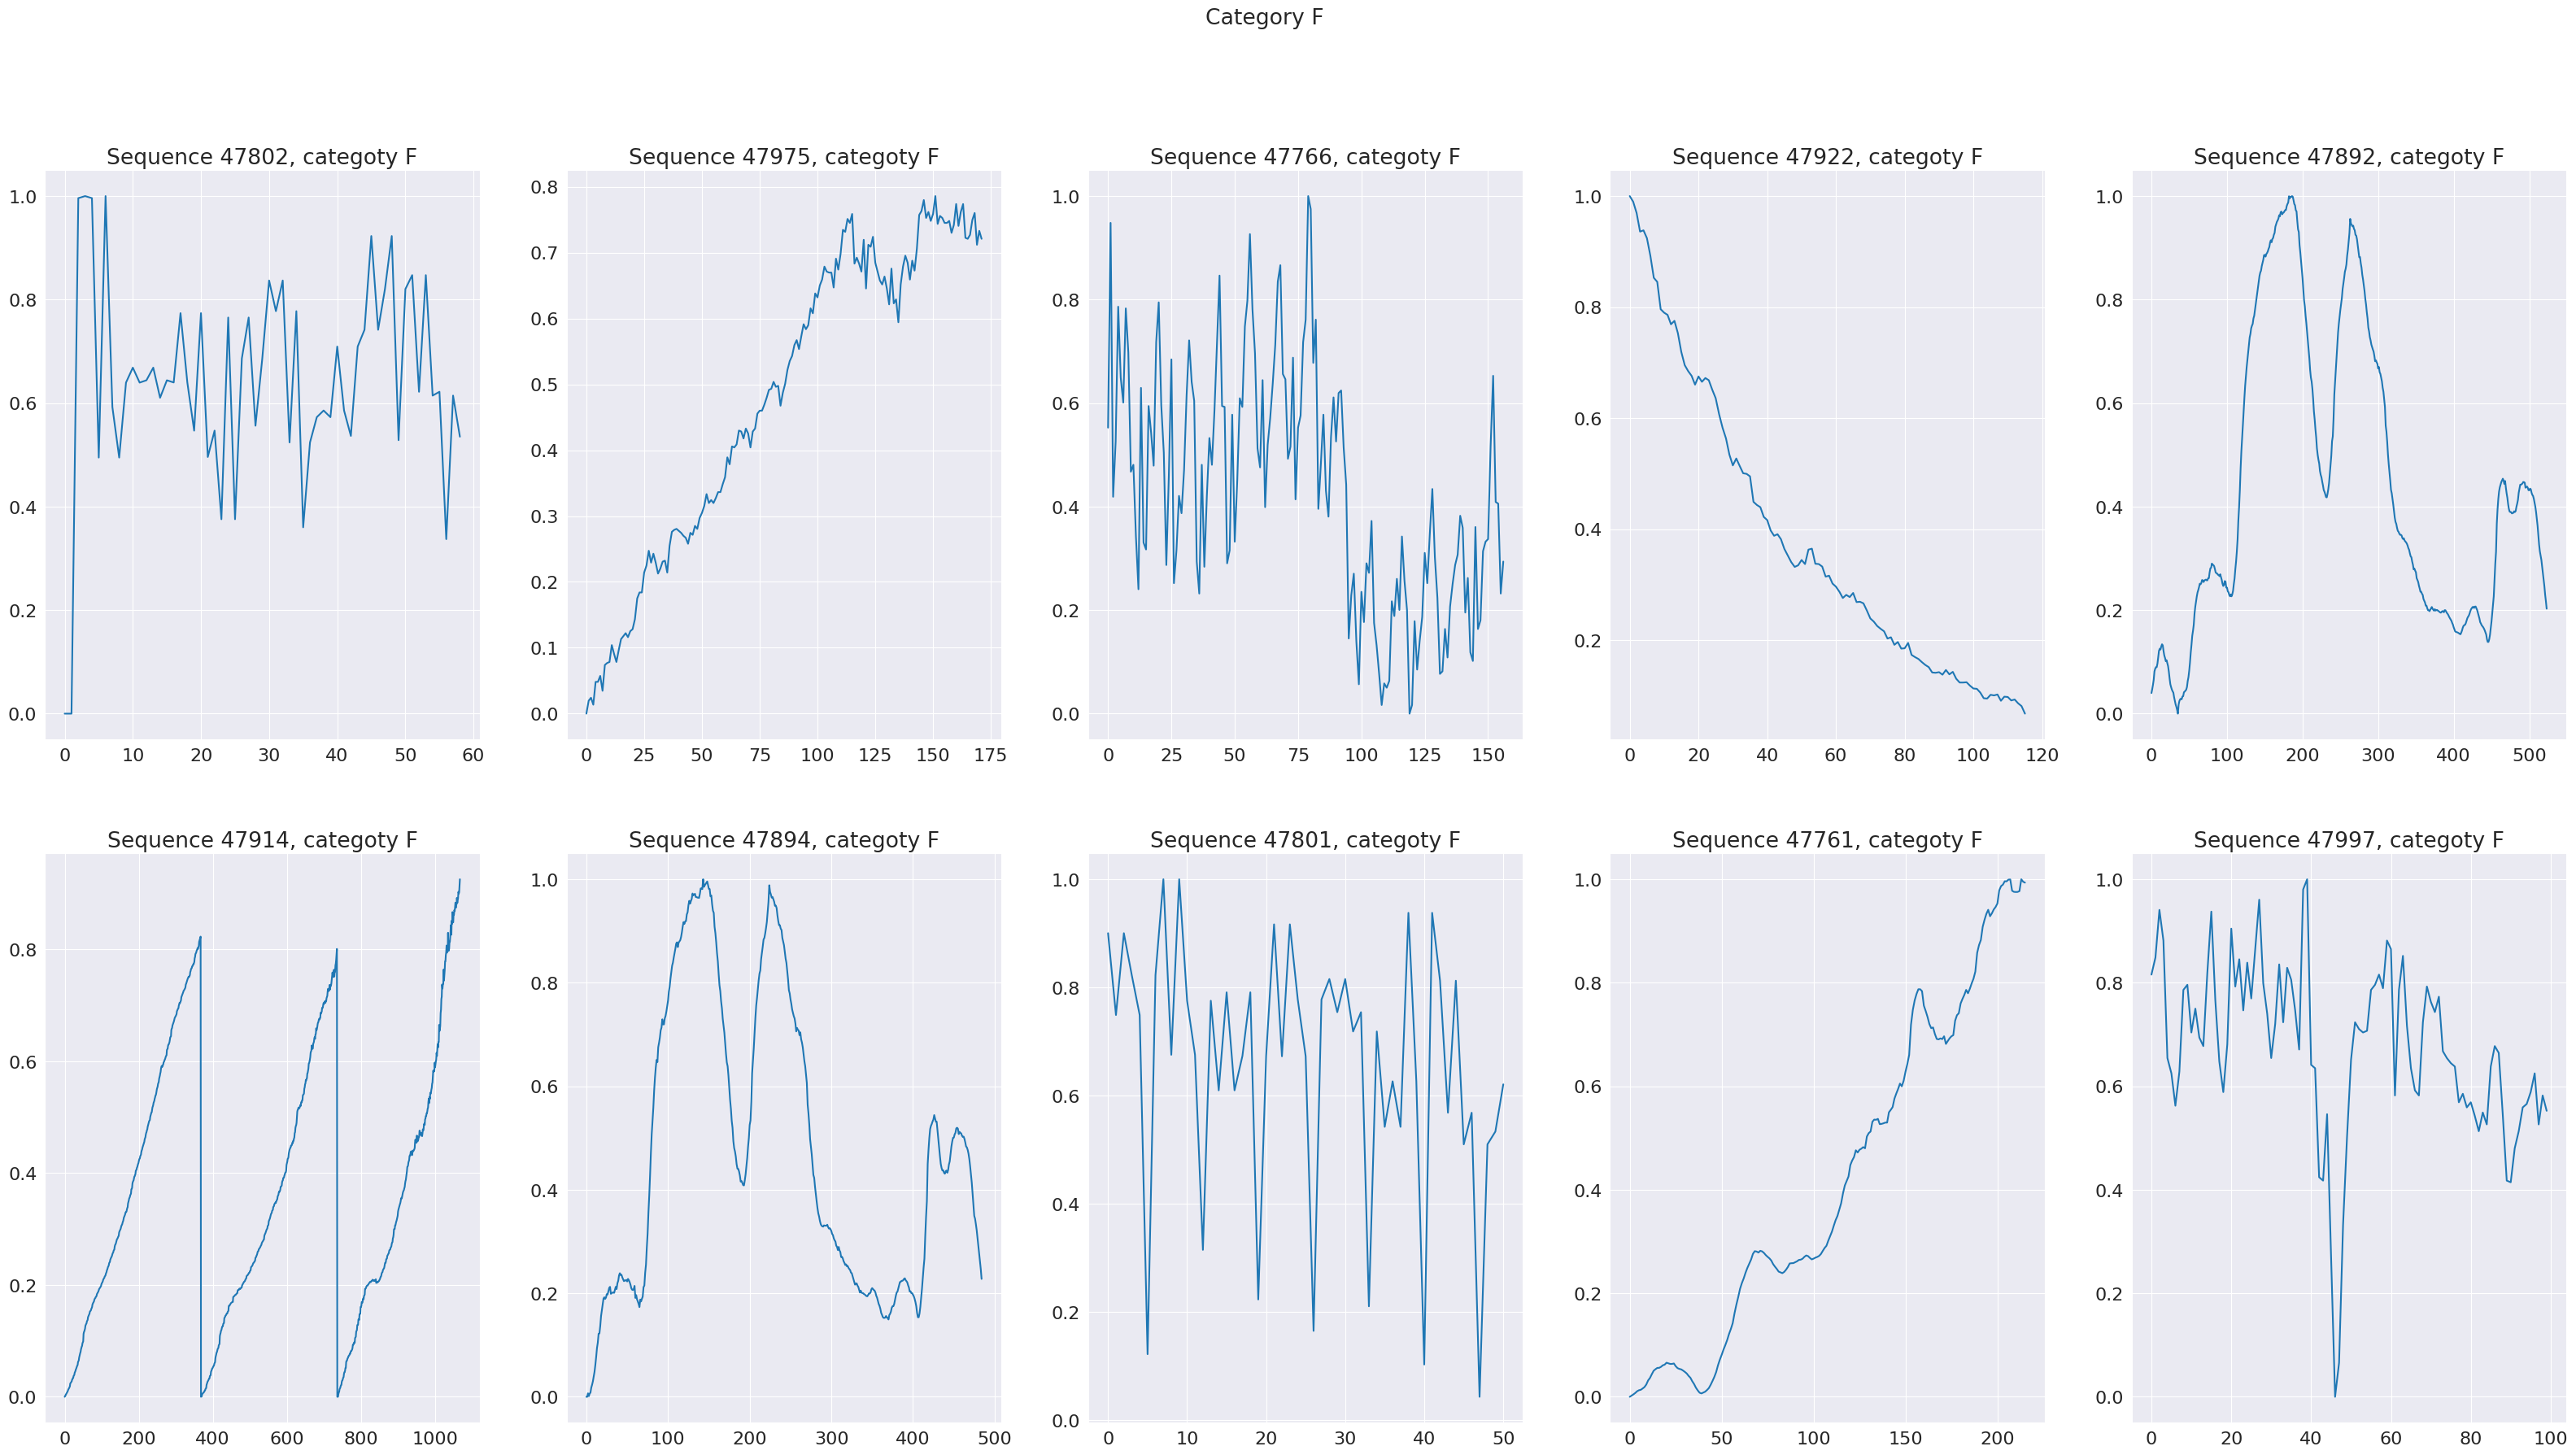

In [39]:
# plot 10 images from each category, sequentially

for i in np.unique(categories):
    plt.figure(figsize=(40, 20))
    for j in range(10):
        d = np.random.randint(0, training_data.shape[0])
        while categories[d] != i:
            d = np.random.randint(0, training_data.shape[0])
        plt.subplot(2, 5, j+1)
        plt.plot(training_data[d, valid_periods[d, 0]:valid_periods[d, 1]])
        plt.title('Sequence {}, categoty {}'.format(d, categories[d]))
    plt.suptitle('Category {}'.format(i))
    plt.show()
